# Malignant Comments Classifier Project Analysis:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
train=pd.read_csv(r'C:\Users\User\Downloads\train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test=pd.read_csv(r'C:\Users\User\Downloads\test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print('train shape is ',train.shape)
print('test shape is ',test.shape)
print('test info',test.info)


print('train info',train.info)

train shape is  (159571, 8)
test shape is  (153164, 2)
test info <bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is no

In [5]:
print('train data Set description',train.describe())
print('test data Set description',test.describe())

train data Set description            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000

# Data Cleaning:-

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


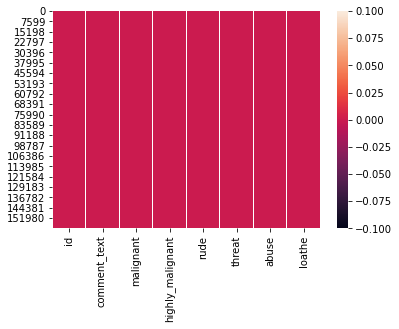

In [6]:
# checking null values

print(train.isnull().sum())

print(sns.heatmap(train.isnull()))
plt.show()

Above observations and heatmap shows that there are no null/missing values present in the dataset.

id              0
comment_text    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


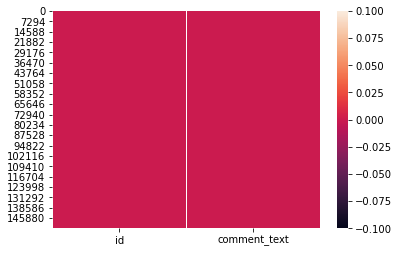

In [7]:
print(test.isnull().sum())

print(sns.heatmap(test.isnull()))
plt.show()

Similarly, in test dataset no null values are there.

# EDA and Data Visualization:-

malignant


0    144277
1     15294
Name: malignant, dtype: int64


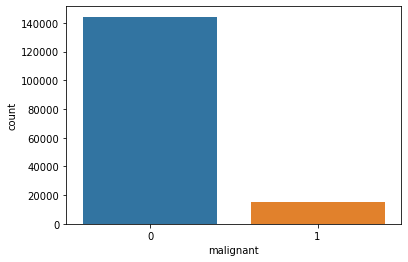

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


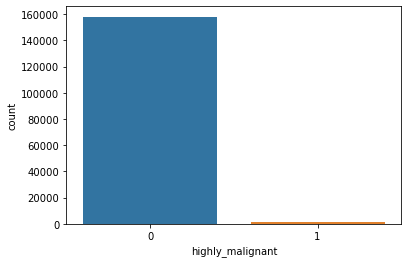

loathe


0    158166
1      1405
Name: loathe, dtype: int64


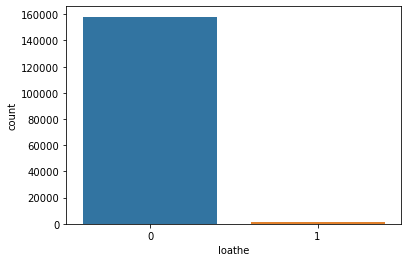

rude


0    151122
1      8449
Name: rude, dtype: int64


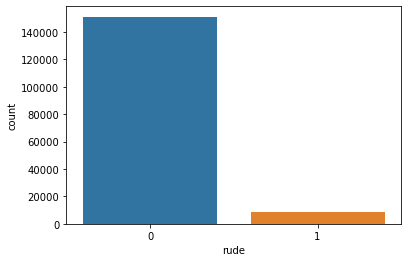

abuse


0    151694
1      7877
Name: abuse, dtype: int64


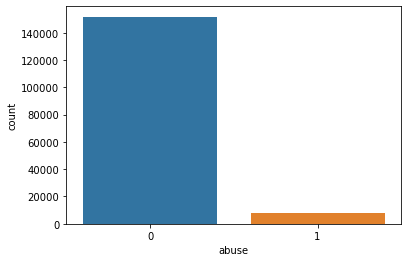

threat


0    159093
1       478
Name: threat, dtype: int64


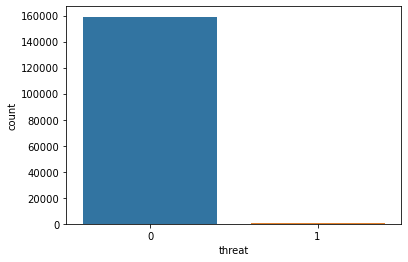

In [8]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

# Pre-Processing the dataframe:-

In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [10]:
train['length'] = train['comment_text'].str.len()
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [11]:
# Convert all messages to lower case

train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'

train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
# Replace URLs with 'webaddress'

train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)

train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'

train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')




# Replace numbers with 'numbr'

train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [12]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [13]:
# Total length removal

print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


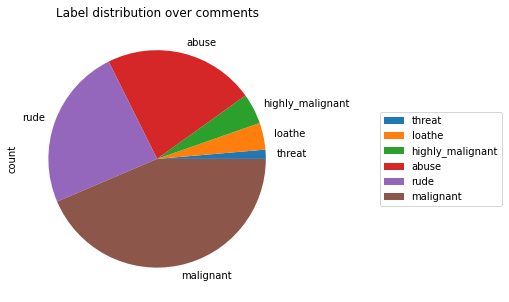

In [14]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

Above pie chart shows that the 'malignant','rude' and 'abusive' comments has highest rate as compared to other bad comments.

In [15]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


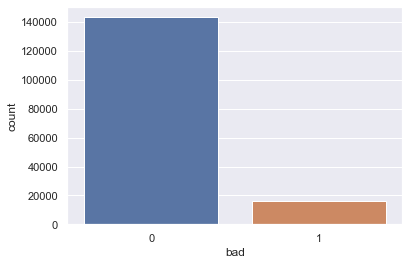

In [16]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

Above countplot shows that the target variable is having imbalanced data.

# Convert text to vectors

In [17]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [18]:
y=train['bad']

In [19]:
train.shape

(159571, 11)

In [20]:
test.shape

(153164, 2)

# Oversampling to resolve imbalancing of the dataset:-

In [21]:
x.shape

(159571, 10000)

In [22]:
y.shape

(159571,)

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
y.value_counts()

0    143346
1     16225
Name: bad, dtype: int64

In [25]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [26]:
y_traint.value_counts()

0    143346
1    143346
Name: bad, dtype: int64

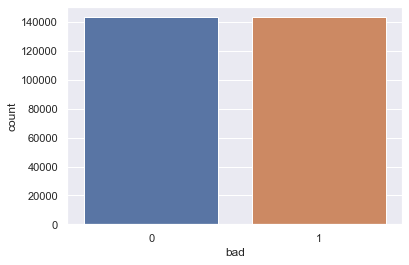

In [27]:
sns.countplot(y_traint)
plt.show()

Hence, the dataset becomes balanced.

# Modelling Phase

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,random_state=56,test_size=.30)

In [30]:
y_train.shape,y_test.shape

((200684,), (86008,))

In [31]:
# LogisticRegression

LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9371898108469036
Test accuracy is 0.928576411496605
[[39576  3597]
 [ 2546 40289]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     43173
           1       0.92      0.94      0.93     42835

    accuracy                           0.93     86008
   macro avg       0.93      0.93      0.93     86008
weighted avg       0.93      0.93      0.93     86008



In [32]:
# DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_dt_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_dt_train)))
y_pred_dt_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_dt_test)))
print(confusion_matrix(y_test,y_pred_dt_test))
print(classification_report(y_test,y_pred_dt_test))

Training accuracy is 0.9979669530206693
Test accuracy is 0.9383661984931634
[[39322  3851]
 [ 1450 41385]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     43173
           1       0.91      0.97      0.94     42835

    accuracy                           0.94     86008
   macro avg       0.94      0.94      0.94     86008
weighted avg       0.94      0.94      0.94     86008



Therefore, Decision Tree Classifier shows the best metrics results among the models.

# Finalizing the best Model

In [33]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(LG,x_traint,y_traint,cv=6)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,y_pred_test)*100)

Cross validation score of Logistic Regression model: [0.90732912 0.93470344 0.93522665 0.93556151 0.93288268 0.93577079]
Mean of Cross validation score: 0.9302456992172784
Accuracy 92.8576411496605


In [34]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(DT,x_traint,y_traint,cv=6)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,y_pred_dt_test)*100)

Cross validation score of Decision Tree Classifier model: [0.93016199 0.94571177 0.9497091  0.9489766  0.94811854 0.9486836 ]
Mean of Cross validation score: 0.9452269334337896
Accuracy 93.83661984931634


Therefore the difference between cv score and r2 score in very less in case of Decision Tree Classifier that is [0.94-0.92=0.02],So we will choose this model for further process.

So, we are getting our model accuracy 94% with almost same cross validation score in our model means that our model is working well.

# Saving the Model

In [35]:
import pickle
filename='Malignant_Comment_Pred.pkl'
pickle.dump(DT,open(filename,'wb'))

# Conclusion

In [36]:
import numpy as np
a=np.array(y_test)
predicted=np.array(DT.predict(x_test))
Malignant_Comment=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Malignant_Comment

,original,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
86003,1,1
86004,0,0
86005,0,0
86006,0,0


# Insights:-

We have been succesfully able to reach the target for classifying Toxic/Malignant Comments. However would like to highlight a 
few points as mentioned below:

    
1. Due the penetration of the internet in all domains of life which has led to increase of people’s participation actively and 
   give remarks as an issue of communicating their concern/feedback/opinion in various online forums. Although most of the times
   these comments are helpful for the creator toextemporize the substance that is being provided to people, but sometimes these 
   may be abusive and create hatred-feeling among the people.Detecting Toxic comments has been a great challenge for the all the
   scholars in the field of research and development. This domain has drawn lot of interests not just because of the spread of 
   hate but also people refraining people from participating in online forums which diversely affects for all the creators/
   content-providers to provide a relief to engage in a healthy public interaction which can be accessed by public without any 
   hesitation. 
  

2. In Data Analysis, i have performed operation with all toxic comments given in this dataset namely 'malignant','highly 
   malignant','rude','loathe','abuse' and 'threat' in which i have observed that 'Malignant','rude' and 'abuse' comments are 
   having highest rate as compared to other comments.